In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

import cpi
# cpi.update()  # Run this line if it's first time using cpi... or needs to update.

# Loading the Data

In [2]:
imdb_movies = pd.read_csv('IMDb movies.csv')
imdb_movies.head()

/home/daniel/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
movies = imdb_movies.dropna(subset=['country']) # Remove data without a country
movies_usa = movies[movies['country'].str.contains('USA')] # Limit data to movies released in USA

movies_usa.sample(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
17530,tt0074715,Baby Needs a New Pair of Shoes,Baby Needs a New Pair of Shoes,1974,1974-11-01,"Crime, Thriller",86,USA,English,Bill Brame,...,"Frank DeKova, Paul Harris, Frances E. Williams...",A numbers king pin tries to stay in business a...,4.5,265,NaN,NaN,NaN,NaN,15.0,12.0
29385,tt0114780,Under Lock and Key,Under Lock and Key,1995,1995,"Action, Crime, Drama",92,USA,English,Henri Charr,...,"Wendi Westbrook, Barbara Niven, Taylor Leigh, ...",An FBI agent goes undercover in a women's pris...,5.1,215,NaN,NaN,NaN,NaN,9.0,1.0
1382,tt0023293,The Old Dark House,The Old Dark House,1932,1932-10-20,"Comedy, Horror, Thriller",72,USA,English,James Whale,...,"Boris Karloff, Melvyn Douglas, Charles Laughto...","Seeking shelter from a storm, five travelers a...",7.1,8877,NaN,$ 25678,$ 34649,NaN,145.0,107.0
33596,tt0159404,Depraved,Depraved,1996,1996,"Drama, Thriller",104,USA,English,Rogelio Lobato,...,"Anthony Guzman, Seidy Lopez, Barbara Niven, Ma...",When a husband discovers his sexually adventur...,3.5,179,NaN,NaN,NaN,NaN,6.0,NaN
85087,tt9064764,Water,Water,2019,2019-02-01,Horror,100,USA,English,Phillip Penza,...,"Adam Berardi, Audrey Beth, Big Brody, Sanel Bu...","New horror movie ""Water"" is an original Philli...",1.8,137,NaN,NaN,NaN,NaN,12.0,NaN
37261,tt0228301,Finding Home,Finding Home,2003,2005-04-29,"Drama, Romance",124,USA,English,Lawrence David Foldes,...,"Lisa Brenner, Misha Collins, Geneviève Bujold,...",Inheriting her grandmother's remote island Inn...,5.5,530,NaN,$ 9736,$ 9736,34.0,36.0,8.0
51305,tt0899145,Don't Fade Away,Don't Fade Away,2010,2011,Drama,89,USA,English,Luke Kasdan,...,"Ryan Kwanten, Mischa Barton, Beau Bridges, Fra...",A troubled music manager on the edge returns f...,4.9,333,$ 2400000,NaN,NaN,NaN,2.0,NaN
69203,tt2945970,The Last American Guido,The Last American Guido,2014,2014-04-05,Comedy,99,USA,English,Vito LaBruno,...,"Mike DiGiacinto, Letitia Becker, Noah Benjamin...","In the 90's, Tommy ruled the Jersey club scene...",7.3,107,$ 200000,NaN,NaN,NaN,1.0,2.0
61944,tt1784365,Blackmail Boys,Blackmail Boys,2010,2010-09-25,"Romance, Thriller",69,USA,English,"Bernard Shumanski, Richard Shumanski",...,"Nathan Adloff, Taylor Reed, Joe Swanberg, Dann...",A sweet and sexually explicit love story becom...,4.3,160,$ 20000,NaN,NaN,NaN,4.0,9.0
2834,tt0029606,È nata una stella,A Star Is Born,1937,1938-11-20,"Drama, Romance",111,USA,English,"William A. Wellman, Jack Conway",...,"Janet Gaynor, Fredric March, Adolphe Menjou, M...",A young woman comes to Hollywood with dreams o...,7.3,8448,$ 1173639,NaN,NaN,77.0,72.0,51.0


In [4]:
pd.options.display.max_rows = 999
print(str(movies_usa.isna().sum()))

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   364
director                    36
writer                     219
production_company        1240
actors                      28
description                 97
avg_vote                     0
votes                        0
budget                   20699
usa_gross_income         23738
worlwide_gross_income    22984
metascore                24817
reviews_from_users         394
reviews_from_critics      2075
dtype: int64


In [5]:
movies_usa.shape

(34325, 22)

# Select Columns relevent to this study

In [6]:
select =  ['imdb_title_id',
           'title',
           'original_title',
           'year',
           'date_published',
           'genre',
           'director',
           'avg_vote',
           'votes',
           'budget']

movies_usa = movies_usa[select]

Sanity Checks

In [7]:
movies_usa['year'].apply(lambda x: x if isinstance(x, int) else int(re.search(r'[0-9]{4}',x).group(0))).min()

1894

In [8]:
movies_usa['year'].apply(lambda x: x if isinstance(x, int) else int(re.search(r'[0-9]{4}',x).group(0))).max()

2020

In [9]:
imdb_movies[imdb_movies['director'] =='Christopher Nolan']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
33306,tt0154506,Following,Following,1998,2000-08-25,"Crime, Mystery, Thriller",69,UK,English,Christopher Nolan,...,"Jeremy Theobald, Alex Haw, Lucy Russell, John ...",A young writer who follows strangers for mater...,7.5,84550,$ 6000,$ 48482,$ 48482,60.0,208.0,137.0
36475,tt0209144,Memento,Memento,2000,2001-01-19,"Mystery, Thriller",113,USA,English,Christopher Nolan,...,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,8.4,1098879,$ 9000000,$ 25544867,$ 39970386,80.0,2278.0,213.0
39779,tt0278504,Insomnia,Insomnia,2002,2002-11-08,"Drama, Mystery, Thriller",118,"USA, UK",English,Christopher Nolan,...,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304,$ 46000000,$ 67355513,$ 113758770,78.0,694.0,113.0
43935,tt0372784,Batman Begins,Batman Begins,2005,2005-06-17,"Action, Adventure",140,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Michael Caine, Liam Neeson, Ka...","After training with his mentor, Batman begins ...",8.2,1278075,$ 150000000,$ 206852432,$ 373654966,70.0,2911.0,324.0
48078,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
48754,tt0482571,The Prestige,The Prestige,2006,2006-12-22,"Drama, Mystery, Sci-Fi",130,"UK, USA",English,Christopher Nolan,...,"Hugh Jackman, Christian Bale, Michael Caine, P...","After a tragic accident, two stage magicians e...",8.5,1155723,$ 40000000,$ 53089891,$ 109676311,66.0,1422.0,363.0
50294,tt0816692,Interstellar,Interstellar,2014,2014-11-06,"Adventure, Drama, Sci-Fi",169,"USA, UK, Canada",English,Christopher Nolan,...,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,8.6,1449256,$ 165000000,$ 188020017,$ 696742056,74.0,4100.0,625.0
57234,tt1345836,Il cavaliere oscuro - Il ritorno,The Dark Knight Rises,2012,2012-08-29,"Action, Adventure",164,"UK, USA","English, Arabic",Christopher Nolan,...,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,8.4,1480582,$ 250000000,$ 448139099,$ 1081133191,78.0,3004.0,547.0
57475,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,8.8,2002816,$ 160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0
76459,tt5013056,Dunkirk,Dunkirk,2017,2017-08-31,"Action, Drama, History",106,"UK, Netherlands, France, USA","English, French, German",Christopher Nolan,...,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...","Allied soldiers from Belgium, the British Empi...",7.9,531422,$ 100000000,$ 189740665,$ 526949403,94.0,2399.0,624.0


# Rating vs Genre Analysis

In [10]:
pd.options.display.max_columns = 999
cleaned = movies_usa.genre.str.split(",", expand=True).stack()
pd.get_dummies(cleaned).groupby(level=0).sum()
movies_usa["genre"] = movies_usa.genre.apply(lambda x: x.replace(" ", ""))
movies_usa = pd.concat([movies_usa, movies_usa["genre"].str.get_dummies(',')], axis = 1)
movies_usa.head()

,imdb_title_id,title,original_title,year,date_published,genre,director,avg_vote,votes,budget,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,Alexander Black,5.9,154,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama,History",Charles L. Gaskill,5.2,446,$ 45000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography,Drama",Sidney Olcott,5.7,484,NaN,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,"André Calmettes, James Keane",5.5,225,$ 30000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,D.W. Griffith,5.8,187,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#looking at avg rating per genre
sum_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(", "))
)
sep = '*'

In [12]:
avg_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["avg_vote"].mean()
)
count_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["title"].count()
)
metrics_per_genre = pd.concat([avg_per_genre, count_per_genre["title"]], axis = 1)
metrics_per_genre = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_per_genre.rename({"title":"count"}, axis = 1, inplace = True)
metrics_per_genre

,genres,avg_vote,count
0,Action,5.337556,5778
2,Adventure,5.749358,3975
3,Animation,6.145531,716
4,Biography,6.599326,1038
5,Comedy,5.705804,11578
6,Crime,5.843096,5214
8,Drama,5.981332,16986
9,Family,5.693080,1633
10,Fantasy,5.458203,1603
11,Film-Noir,6.641935,651


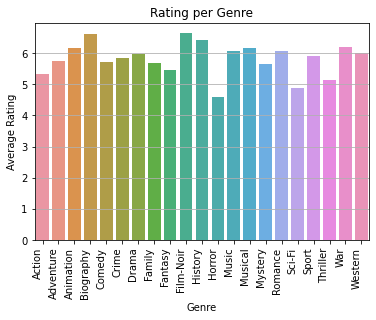

In [13]:
g = sns.barplot(data=metrics_per_genre, x= "genres", y = "avg_vote")
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.grid(axis = 'y')
g.set(xlabel='Genre', ylabel='Average Rating')
g.set_title("Rating per Genre");

# Rating vs Director Analysis

In [14]:
avg_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["avg_vote"].mean()
)
count_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["title"].count()
)

metrics_dir = pd.concat([avg_per_director, count_per_director["title"]], axis = 1)
#metrics_dir = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_dir.rename({"title":"count"}, axis = 1, inplace = True)
metrics_dir = metrics_dir.sort_values("avg_vote", axis = 0, ascending=False)
metrics_dir = metrics_dir[metrics_dir["count"] >= 5]
metrics_dir

,directors,avg_vote,count
4186,Christopher Nolan,8.290000,10
12271,Quentin Tarantino,7.858333,12
12060,Peter Jackson,7.822222,9
13917,Stanley Kubrick,7.784615,13
4896,David Fincher,7.760000,10
...,...,...,...
5375,Donald Farmer,2.483333,6
3139,Bill Zebub,2.483333,6
10305,Mark Polonia,2.377778,9
2436,Andrew Bellware,2.220000,5


In [15]:
## This chunk will take a long time to load, and isn't really necessary for the analysis.

# g = sns.barplot(data=metrics_dir, x= "directors", y = "avg_vote")
# g.set_xticklabels(g.get_xticklabels(), 
#                           rotation=90, 
#                           horizontalalignment='right')
# g.set(xlabel='Director', ylabel='Average Rating')
# g.set_title("Rating per Director");

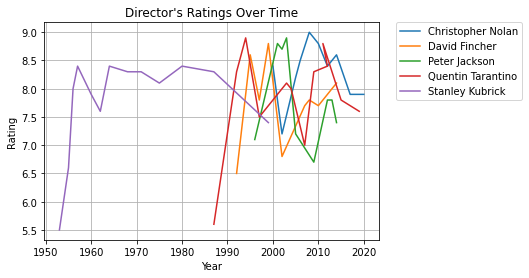

In [16]:
directors = metrics_dir["directors"].values.tolist()
top_directors = directors[0:5] 
movies_small = movies_usa[movies_usa["director"].isin(top_directors)]

table = pd.pivot_table(movies_small, index = ["director", "year"], values = ["avg_vote"])
g = sns.lineplot(data=table.reset_index(), x = "year", y = "avg_vote", hue = "director")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
g.set(xlabel='Year', ylabel='Rating')
g.set_title("Director's Ratings Over Time");

# Rating vs Budget Analysis

Convert to date time (wasn't needed)

In [17]:
movies_usa['date_published'] = pd.to_datetime(movies_usa['date_published'], format='%Y-%m-%d', errors = 'coerce' )
movies_usa.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published    datetime64[ns]
genre                     object
director                  object
avg_vote                 float64
votes                      int64
budget                    object
Action                     int64
Adult                      int64
Adventure                  int64
Animation                  int64
Biography                  int64
Comedy                     int64
Crime                      int64
Documentary                int64
Drama                      int64
Family                     int64
Fantasy                    int64
Film-Noir                  int64
History                    int64
Horror                     int64
Music                      int64
Musical                    int64
Mystery                    int64
News                       int64
Reality-TV                 int64
Romance                    int64
Sci-Fi    

We were going to scrape BLS data for inflation, but someone already made a library for that

In [18]:
def convert_budget(row):
    '''
    Filters for budgets that uses '$' and then adjusts for inflation based on year movie released
    '''
    if pd.isnull(row['budget']):
        return np.nan
    year = row['year'] if isinstance(row['year'], int) else  int(re.search(r'[0-9]{4}',row['year']).group(0))
    
    if year < 1913 :
        return np.nan
    
    if '$' in row['budget']:
        if year == 2020:
            return int(row['budget'].replace('$', ''))
        else:
            budget = int(row['budget'].replace('$', ''))
            return cpi.inflate(budget, year)
    else:
        return np.nan


In [19]:
movies_usa['adjusted_budget'] = movies_usa.apply(convert_budget, axis = 1)

In [20]:
movies_usa.head()

,imdb_title_id,title,original_title,year,date_published,genre,director,avg_vote,votes,budget,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,adjusted_budget
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,Alexander Black,5.9,154,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama,History",Charles L. Gaskill,5.2,446,$ 45000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913-01-01,"Biography,Drama",Sidney Olcott,5.7,484,NaN,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,"André Calmettes, James Keane",5.5,225,$ 30000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,D.W. Griffith,5.8,187,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [21]:
print(str(movies_usa.isna().sum()))

imdb_title_id          0
title                  0
original_title         0
year                   0
date_published         1
genre                  0
director              36
avg_vote               0
votes                  0
budget             20699
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Reality-TV             0
Romance                0
Sci-Fi                 0
Sport                  0
Thriller               0
War                    0
Western                0
adjusted_budget    20928
dtype: int64


In [22]:
movies_reg = movies_usa[["avg_vote", "adjusted_budget"]]
movies_reg = movies_reg[movies_reg["adjusted_budget"].notna()]
movies_reg = movies_reg[movies_reg["adjusted_budget"] != 0]

In [23]:
movies_reg.adjusted_budget.min()

1.0

In [24]:
movies_usa[movies_usa['adjusted_budget'] < 10]

,imdb_title_id,title,original_title,year,date_published,genre,director,avg_vote,votes,budget,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,adjusted_budget
37449,tt0233481,Cookers,Cookers,2001,2001-04-23,"Drama,Horror",Dan Mintz,5.7,788,$ 5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.217871
55022,tt11777308,Murder Death Koreatown,Murder Death Koreatown,2020,2020-03-21,"Crime,Horror,Mystery",NaN,5.1,140,$ 0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.000000
65543,tt2226440,Dead Men,Dead Men,2018,2018-01-02,"Action,Western",Royston Innes,4.5,294,$ 0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
72514,tt3748918,To Your Last Death,To Your Last Death,2019,2020-03-17,"Animation,Action,Horror",Jason Axinn,7.3,2189,$ 1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000000
73034,tt3889450,American Sharia,American Sharia,2017,2017-02-01,"Comedy,Drama",Omar Regan,3.6,167,$ 0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
74996,tt4540326,Buried,Buried,2011,2011-06-25,Thriller,Emilie Peters,7.2,191,$ 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
75333,tt4655630,Drifter,Drifter,2016,2017-02-24,"Crime,Horror,Thriller",Chris von Hoffmann,3.6,751,$ 0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000000
77145,tt5229754,She Was So Pretty,She Was So Pretty,2016,2016-06-24,Horror,Brooklyn Ewing,3.8,163,$ 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000
77212,tt5252440,Hot Wheels Acceleracers the Ultimate Race,Hot Wheels Acceleracers the Ultimate Race,2005,2005-10-01,"Animation,Action,Sci-Fi",Gino Nichele,7.4,159,$ 0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000
77523,tt5345298,Patient Seven,Patient Seven,2016,2016-10-11,Horror,"Danny Draven, Paul Davis",5.0,2602,$ 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000


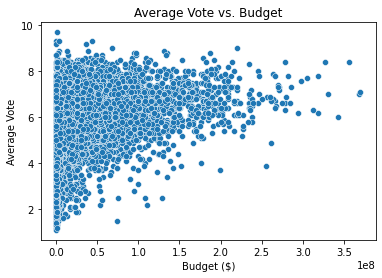

In [25]:
g = sns.scatterplot(data=movies_reg, x="adjusted_budget", y = "avg_vote")
g.set(xlabel='Budget ($)', ylabel='Average Vote')
g.set_title("Average Vote vs. Budget");

## Top rated movie per year

Regression on rating and budget after filtering for top rated movie per year

In [26]:
top_movies = movies_usa.groupby("year")
top_movies= top_movies.apply(lambda x: x.sort_values(["avg_vote"], ascending=False))
top_movies=top_movies.reset_index(drop=True)
top_movies = top_movies.groupby("year").head(1)
top_movies = top_movies[top_movies.adjusted_budget.notna()][["year","avg_vote", "adjusted_budget"]]
top_movies

,year,avg_vote,adjusted_budget
4,1913,6.0,1.471965e+05
37,1916,7.8,9.051360e+06
93,1919,7.3,1.300452e+06
122,1920,7.4,8.947995e+06
152,1921,8.3,3.570628e+06
180,1922,7.2,2.282652e+07
210,1923,8.1,1.809035e+06
266,1925,8.2,1.348408e+07
313,1926,8.1,1.083292e+07
367,1927,8.1,2.938586e+06


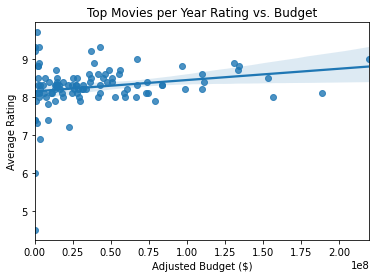

In [27]:
g = sns.regplot(data=top_movies, x = "adjusted_budget", y = "avg_vote")
g.set(xlabel='Adjusted Budget ($)', ylabel='Average Rating')
g.set_title("Top Movies per Year Rating vs. Budget");

In [28]:
movies_reg["avg_vote"].corr(movies_reg["adjusted_budget"])

0.28401616886063635

# Regression Analysis

In [29]:
reg = movies_usa[['avg_vote', 'adjusted_budget', 'genre']]

In [30]:
reg = reg.dropna()

In [31]:
X = reg[['genre', 'adjusted_budget']]
y = reg['avg_vote']

X = pd.concat([X, X['genre'].str.get_dummies(',')], axis = 1)
# X = pd.concat([X, X['director'].str.get_dummies()], axis = 1)

X.drop(['genre'], axis = 1, inplace = True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)

/home/daniel/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_vote'>

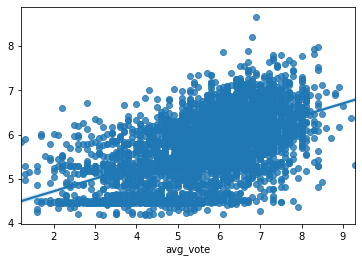

In [36]:
sns.regplot(y_test, predictions)

In [37]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_sm).fit()

print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_vote   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:51:18   Log-Likelihood:                -14460.
No. Observations:                9377   AIC:                         2.897e+04
Df Residuals:                    9352   BIC:                         2.915e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1126      0.042    1

In [38]:
top_100_directors = directors[0:100] 

In [46]:
reg2 = movies_usa[['avg_vote', 'adjusted_budget', 'genre', 'director']]
reg2 = reg2.dropna()
reg2 = reg2[reg2['director'].isin(top_100_directors)]
X2 = reg2[['genre', 'adjusted_budget', 'director']]
y2 = reg2['avg_vote']

X2 = pd.concat([X2, X2['genre'].str.get_dummies(',')], axis = 1)
X2 = pd.concat([X2, X2['director'].str.get_dummies()], axis = 1)

X2.drop(['genre', 'director'], axis = 1, inplace = True)

/home/daniel/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_vote'>

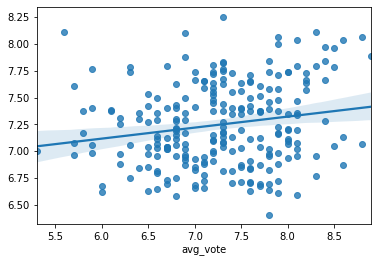

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
predictions2 = model2.predict(X2_test)
sns.regplot(y2_test, predictions2)

In [54]:
X_train_sm2 = sm.add_constant(X2_train)
ls2 = sm.OLS(y2_train, X_train_sm2).fit()

print(ls2.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_vote   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     1.948
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.38e-06
Time:                        21:00:11   Log-Likelihood:                -459.75
No. Observations:                 551   AIC:                             1136.
Df Residuals:                     443   BIC:                             1601.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.5659 